### 1번

다음은 미국 해군병원의 업무시간과 관련된 자료이다.

x1: average daily patient load  
x2: monthly X-ray exposures  
x3: monthly occupied bed days  
x4: average length of patients' stay in days  
y: monthly labor hours

In [1]:
Hospital = c(1:17)

x1 = c(15.57, 44.02, 20.42, 18.74, 49.20, 44.92, 55.48, 59.28, 94.39, 128.08,
       96.00, 131.42, 127.21, 252.90, 409.020, 463.70, 510.22)

x2 = c(2463, 2048, 3940, 6505, 5723, 11520, 5779, 5969, 8461, 20106,
       13313, 10771, 15543, 36194, 34703, 39204, 86533)

x3 = c(472.920, 1339.755, 620.258, 568.337, 1497.607, 1365.830, 1687.003, 1639.927, 2872.337, 3655.085,
       2912.009, 3921.007, 3865.678, 7684.107, 12446.334, 14098.404, 15524.006)

x4 = c(4.45, 6.92, 4.28, 3.90, 5.50, 4.66, 5.62, 5.15, 6.18, 6.15,
       5.88, 4.88, 5.50, 7.00, 10.78, 7.05, 6.35)

y = c(566.52, 696.82, 1033.15, 1603.62, 1611.37, 1613.27, 1854.17, 2160.55, 2305.58, 3503.93,
      3571.89, 3741.40, 4026.52, 10343.81, 11732.17, 15414.94, 18854.45)

(1) <img src="https://latex.codecogs.com/svg.image?&space;y_i=\beta_0&plus;\beta_1&space;x_{1i}&plus;\beta_2&space;x_{2i}&plus;\beta_3&space;x_{3i}&plus;\beta_4&space;x_{4i}&plus;u_i"> 모형을 적합시키시오.

또한, studentized residual을 y축으로 <img src="https://latex.codecogs.com/svg.image?\hat{y}">을 x축으로 산점도를 그려 모형에 문제가 없는지 살펴보고, F-test를 하시오.

In [2]:
# 데이터 프레임 생성
df = data.frame(Hospital, x1, x2, x3, x4, y)

# 선형 회귀 모형 적합
result = lm(y ~ x1+x2+x3+x4, data=df)

summary(result)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-552.14 -385.32  -91.37  295.59 1596.21 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1576.65595  801.52944   1.967   0.0727 .
x1           -53.86104   69.59610  -0.774   0.4540  
x2             0.05413    0.02042   2.651   0.0211 *
x3             2.74054    2.27892   1.203   0.2523  
x4          -317.92068  155.62193  -2.043   0.0637 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 623.6 on 12 degrees of freedom
Multiple R-squared:  0.9906,	Adjusted R-squared:  0.9874 
F-statistic: 315.1 on 4 and 12 DF,  p-value: 4.889e-12


적합된 식은 다음과 같다.

<img src="https://latex.codecogs.com/svg.image?\hat{y}=1576.656-53.861\cdot&space;x_1&plus;0.054\cdot&space;x_2&plus;2.74\cdot&space;x_3-317.921\cdot&space;x_4">

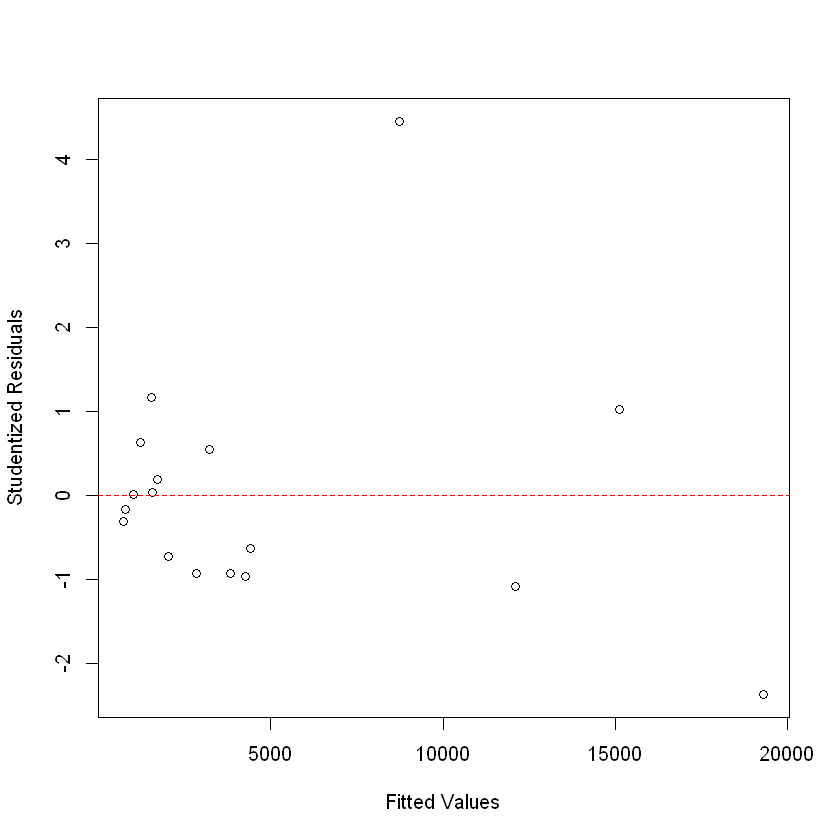

In [8]:
library(MASS)

fitted_values = fitted(result)
stud_res = studres(result)

plot(fitted_values, stud_res, xlab="Fitted Values", ylab="Studentized Residuals")
abline(h=0, col="red", lty=2)

2개 데이터(14, 17)를 제외하면 Studentized Residuals가 -1 ~ 1 범위에 분포하고 있기 때문에 모형에 크게 문제가 있다고 보기 어렵다고 판단된다.

In [4]:
summary(result)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-552.14 -385.32  -91.37  295.59 1596.21 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1576.65595  801.52944   1.967   0.0727 .
x1           -53.86104   69.59610  -0.774   0.4540  
x2             0.05413    0.02042   2.651   0.0211 *
x3             2.74054    2.27892   1.203   0.2523  
x4          -317.92068  155.62193  -2.043   0.0637 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 623.6 on 12 degrees of freedom
Multiple R-squared:  0.9906,	Adjusted R-squared:  0.9874 
F-statistic: 315.1 on 4 and 12 DF,  p-value: 4.889e-12


F-test 결과 F 통계량은 315.1이고, p-value는 0에 매우 가까운 작은 값이다.  
따라서, 모든 독립변수의 회귀계수가 0이라는 귀무가설이 기각되었다고 할 수 있다.

(2) 위의 모형에서 각 독립변수들의 VIF 값을 구하고, multicollinearity가 있는지 판단하시오.

In [6]:
library(car)

vif_values = vif(result)
print(vif_values)

         x1          x2          x3          x4 
5167.418824    7.767284 5144.837957    2.491100 


x1, x3 변수의 VIF 값이 매우 크기 때문에 다중공선성이 있다고 판단된다.

### 2번

다음 표는 3개의 독립변수(X1, X2, X3)가 있는, 가능한 모든 회귀식의 결과이다. 다음 물음에 답하라.(단, n=100)

|p|Reg.Equation|SSR|SSE|R^2|Cp|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1)">|4547.3|863.9|0.840||
|1|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2)">|2404.3|3006.9|0.444||
|1|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2)">|4596.5|814.7|0.849||
|2|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2)">|4627.8|783.4|0.855||
|2|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">|5012.7|398.4|0.926||
|2|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2, X_3)">|4612.0|799.2|0.852||
|3|<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2, X_3)">|5013.6|397.6|0.927||


(1) 각 Regression equation에서 Cp를 계산하고, Cp 통계량에 근거하여 적절한 모형을 선택하여라.

Mallow의 Cp 통계량은 다음 식으로 나타낼 수 있다.

<img src="https://latex.codecogs.com/svg.image?C_p=\frac{RSS_p}{\hat\sigma^2}&plus;2p-n">

RSSp 는 Residual Sum of Squares의 약자로 잔차제곱합이며, 첨자 p는 p개의 변수가 포함된 모델임을 의미한다.(문제에서는 SSE(Sum of Squares estimation of Error)로 표기되어 있다.)

<img src="https://latex.codecogs.com/svg.image?\hat\sigma^2">는 모든 변수가 포함된 모델의 잔차 분산의 불편 추정치 이며, 다음의 식으로 계산한다.

<img src="https://latex.codecogs.com/svg.image?\hat\sigma^2=\frac{RSS}{n-p}">

In [29]:
# 주어진 데이터 입력
n = rep(100.0, 7)
p = c(1,1,1,2,2,2,3)
reg_eq = c("Y_hat = f(X1)", "Y_hat = f(X2)", "Y_hat = f(X3)",
           "Y_hat = f(X1, X2)", "Y_hat = f(X1, X3)", "Y_hat = f(X2, X3)",
           "Y_hat = f(X1, X2, X3)")
SSR = c(4547.3, 2404.3, 4596.5, 4627.8, 5012.7, 4612.0, 5013.6)
SSE = c(863.9, 3006.9, 814.7, 783.4, 398.4, 799.2, 397.6)
R_sq = c(0.840, 0.444, 0.849, 0.855, 0.926, 0.852, 0.927)

# sigma_hat_sq를 계산한다.
sigma_hat_sq = 397.6 / (100-3)

# 데이터 프레임 생성한다.
df = data.frame(n, p, reg_eq, SSR, SSE, R_sq)

# Cp 를 계산하여 데이터 프레임에 추가한다.
df$Cp = round(df$SSE / sigma_hat_sq + 2 * df$p - df$n, 2)

In [30]:
df

n,p,reg_eq,SSR,SSE,R_sq,Cp
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100,1,Y_hat = f(X1),4547.3,863.9,0.840,112.76
100,1,Y_hat = f(X2),2404.3,3006.9,0.444,635.57
100,1,Y_hat = f(X3),4596.5,814.7,0.849,100.76
100,2,"Y_hat = f(X1, X2)",4627.8,783.4,0.855,95.12
100,2,"Y_hat = f(X1, X3)",5012.7,398.4,0.926,1.20
100,2,"Y_hat = f(X2, X3)",4612.0,799.2,0.852,98.98
100,3,"Y_hat = f(X1, X2, X3)",5013.6,397.6,0.927,3.00


우리는 p가 작고, Cp의 값이 p보다 작거나 비슷한 모델을 찾아야 하는데,  
X1과 X3 변수를 사용하는  
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">  
모델이 그 조건을 가장 잘 충족한다.

(2) BE(Backward Elimination) method를 이용하여 model을 선택하여라.

후진제거법(Backward Elimination method)를 사용할 때는 모든 독립변수를 포함한 모델부터 분석을 시작한다.

<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2, X_3)"> 모델의 SSE는 397.6 이고, R제곱값은 0.927 이다.

여기서 각각 X1, X2, X3 변수를 제외했을 때 SSE와 R제곱값이 어떻게 변하는지 살펴보면

X1 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2, X_3)">  
SSE는 799.2, R제곱값은 0.852 이다.

X2 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">  
SSE는 398.4, R제곱값은 0.926 이다.

X3 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2)">  
SSE는 783.4, R제곱값은 0.855 이다.

따라서 독립변수 X1, X2, X3를 모두 선택했을 때와 X2를 제거했을 때를 비교하면 X2를 제거했음에도 불구하고 SSE와 R제곱값이 거의 변동이 없으므로 X2를 제거하는 것이 타당하다.

<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)"> 모델에서 X1 또는 X3를 더 제거해야 할지 여부를 판단해보자.

X1 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_3)">  
SSE는 814.7, R제곱값은 0.849 이다.

X3 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1)">  
SSE는 863.9, R제곱값은 0.840 이다.

X1 또는 X3 어떤 변수를 제거하더라도 SSE가 크게 증가하고, R제곱값이 감소한다.  
따라서, 더 이상의 변수를 제거하지 않는다.

최종적으로 선택한 모델은  
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">이다.

(3) FS(Forward Selection) method를 이용하여 model을 선택하여라.

전진선택법(Forward Selection Method)을 사용할 때는 단일변수 모델을 선택하는 단계부터 시작한다.

X1, X2, X3 중에 어떤 변수를 선택해야 할지 살펴보자.

X1을 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1)">  
SSE는 863.9 이고, R제곱값은 0.840 이다.

X2를 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2)">  
SSE는 3006.9 이고, R제곱값은 0.444 이다.

X3를 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_3)">  
SSE는 814.7 이고, R제곱값은 0.849 이다.

X1과 X3 중에 하나를 선택할 수 있는 것으로 보이는데, 비율적으로 보아 R제곱값의 차이보다 SSE의 차이가 더 크기 때문에 X3를 선택한다.

X3 다음으로 어떤 변수를 선택해야 할지 살펴보자.

X1을 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">  
SSE는 398.4 이고, R제곱값은 0.926 이다.

X2를 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_2, X_3)">  
SSE는 799.2 이고, R제곱값은 0.852 이다.

X1을 선택했을 때 SSE도 감소하고, R제곱값도 증가하기 때문에 X1을 선택한다.

남은 변수인 X2를 추가해야 하는지 살펴보자.

X2까지 선택하면 <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2, X_3)">  
SSE는 397.6 이고, R제곱값은 0.927 이다.

X2 변수를 추가했음에도 불구하고 SSE, R제곱값에는 크게 변동이 없으므로 X2는 선택하지 않는다.

최종적으로 선택한 모델은  
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)"> 이다.

(4) Stepwise method를 이용하여 model을 선택하여라.

단계적 회귀방법은 전진선택법과 후진제거법을 결합하여 변수 선택 과정을 진행하는 방법이다.

1. 시작은 전진선택법과 같이 단일변수 모델로 시작한다. 전진선택법과 같이 X3를 선택한다.

X3를 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_3)">  
SSE는 814.7 이고, R제곱값은 0.849 이다.

2. 단일변수 모델에서 변수를 추가한다. 마찬가지로 전진선택법을 사용한다.

추가되는 변수는 X1이 된다.
X1을 선택했을 때, <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)">  
SSE는 398.4 이고, R제곱값은 0.926 이다.

3. 다음으로는 후진선택법을 사용하여 선택된 변수 중에서 제거해야 하는 변수가 있는지 확인한다.
선택된 X1, X3 중에서 제거해야 하는 변수가 있는지 확인한다.

X1 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_3)">  
SSE는 814.7, R제곱값은 0.849 이다.

X3 제거했을 때,
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1)">  
SSE는 863.9, R제곱값은 0.840 이다.

X1 또는 X3 어떤 변수를 제거하더라도 SSE가 크게 증가하고, R제곱값이 감소한다.  
따라서, 더 이상의 변수를 제거하지 않는다.

실제 변수 데이터가 있다면 제거할 변수를 선택할 때 X1, X3 변수가 유의성 검정을 통과하는지 살펴볼 수 있다. 하지만, 이 문제에서는 실제 데이터가 없으므로 생략한다.

4. 제거할 변수가 없으므로 다시 전진선택법으로 변수를 추가할 지 판단한다.

X2까지 선택하면 <img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_2, X_3)">  
SSE는 397.6 이고, R제곱값은 0.927 이다.

X2 변수를 추가해도 SSE, R제곱값에는 크게 변동이 없으므로 X2는 추가하지 않는다.

5. 전진선택법, 후진제거법을 모두 실행해도 모델에 변화가 없으므로 과정을 종료한다.

최종적으로 선택한 모델은  
<img src="https://latex.codecogs.com/svg.image?\hat{Y}=f(X_1, X_3)"> 이다.

